In [1]:
from utils.DatasetToCSVROP313 import DatasetToCSVROP313Class

In [5]:
# Path to the folder containing XYZ files
folder_path = "data/rop313/orop"

dataset_to_csv = DatasetToCSVROP313Class()
df = dataset_to_csv.process_files(folder_path)
df

Error converting XYZ to SMILES for file data/rop313/orop/87/1.b973c.xyz: Final molecular charge (0) does not match input (-1); could not find valid bond ordering
Error converting XYZ to mol for file data/rop313/orop/87/1.b973c.xyz: Final molecular charge (0) does not match input (-1); could not find valid bond ordering
Error converting XYZ to SMILES for file data/rop313/orop/191/1.b973c.xyz: Final molecular charge (-1) does not match input (-10); could not find valid bond ordering
Error converting XYZ to mol for file data/rop313/orop/191/1.b973c.xyz: Final molecular charge (-1) does not match input (-10); could not find valid bond ordering
Error converting XYZ to SMILES for file data/rop313/orop/178/1.b973c.xyz: Valence of atom 11 is 3, which is larger than the allowed maximum, 1
Error converting XYZ to mol for file data/rop313/orop/178/1.b973c.xyz: Valence of atom 11 is 3, which is larger than the allowed maximum, 1
Error converting XYZ to SMILES for file data/rop313/orop/180/1.b973c.

,system_number,dG_red,Solvent,Charge_gn,Charge_rd,UHF_gn,UHF_rd,SMILES_1,NumAtoms_1,mol
0,71,0.88,acetonitrile,1,0,1,0,c1ccc(N2CCOCC2)cc1,25,<rdkit.Chem.rdchem.Mol object at 0x7f3eadb964f0>
1,87,2.02,acetonitrile,1,0,1,0,None,28,None
2,110,-1.46,acetonitrile,0,-1,0,1,O=C(CBr)c1ccccc1,17,<rdkit.Chem.rdchem.Mol object at 0x7f3ea6ea99f0>
3,121,-1.94,acetonitrile,0,-1,0,1,Cc1ccccc1C=O,17,<rdkit.Chem.rdchem.Mol object at 0x7f3ea7504bd0>
4,141,-2.33,acetonitrile,0,-1,0,1,O=C1CCCCC1,17,<rdkit.Chem.rdchem.Mol object at 0x7f3ea6f5ff90>
...,...,...,...,...,...,...,...,...,...,...
188,40,2.10,acetonitrile,1,0,1,0,CC(C)=CCO,16,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dcb30>
189,16,1.54,acetonitrile,1,0,1,0,c1ccccc1,12,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dc9f0>
190,50,1.43,acetonitrile,1,0,1,0,Cc1ccc(O)cc1C,19,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dca40>
191,132,-1.91,acetonitrile,0,-1,0,1,C(=Nc1ccccc1)c1ccccc1,25,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dcc70>


In [3]:
# Save DataFrames to CSV files
df.to_csv("data/OROP.csv", index=False)

print("DataFrames saved:")
print(f"{len(df)} records")

DataFrames saved:
193 records


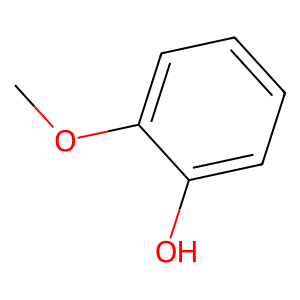

In [55]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the SMILES string
smiles_string = "COc1ccccc1O"

# Convert the SMILES string to a molecule
mol = Chem.MolFromSmiles(smiles_string)

# Draw the molecule and display the image
img = Draw.MolToImage(mol)
img.show()

In [11]:
'''
how to calculate smiles from xyz file in rdkit
'''
from rdkit.Chem import  MolToSmiles, rdDetermineBonds, Draw, MolFromXYZFile, Mol, RemoveHs
raw_mol = MolFromXYZFile('data/rop313/orop/124/1.gfn2.xyz')
mol = Mol(raw_mol)
rdDetermineBonds.DetermineBonds(mol, charge=0)
mol_no_h = RemoveHs(mol)
smi = MolToSmiles(mol_no_h, canonical=True, isomericSmiles=False)
print("SMILES:", smi)
img = Draw.MolToImage(mol_no_h)


output_image_file = "mol.png"
img.save(output_image_file)

SMILES: O=Cc1ccc2ccccc2c1


In [6]:
#cleaning up dataset
# saving only id and correct SMILES

import pandas as pd 


df=df.drop(columns=['dG_red', 'Solvent', 'Charge_gn', 'Charge_rd', 'UHF_gn', 'UHF_rd', 'NumAtoms_1', 'SMILES_1'])


df

,system_number,mol
0,71,<rdkit.Chem.rdchem.Mol object at 0x7f3eadb964f0>
1,87,None
2,110,<rdkit.Chem.rdchem.Mol object at 0x7f3ea6ea99f0>
3,121,<rdkit.Chem.rdchem.Mol object at 0x7f3ea7504bd0>
4,141,<rdkit.Chem.rdchem.Mol object at 0x7f3ea6f5ff90>
...,...,...
188,40,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dcb30>
189,16,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dc9f0>
190,50,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dca40>
191,132,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dcc70>


In [17]:
df = df.dropna(subset=['mol'])
df

,system_number,mol
0,71,<rdkit.Chem.rdchem.Mol object at 0x7f3eadb964f0>
2,110,<rdkit.Chem.rdchem.Mol object at 0x7f3ea6ea99f0>
3,121,<rdkit.Chem.rdchem.Mol object at 0x7f3ea7504bd0>
4,141,<rdkit.Chem.rdchem.Mol object at 0x7f3ea6f5ff90>
5,170,<rdkit.Chem.rdchem.Mol object at 0x7f3ea6f3ef40>
...,...,...
188,40,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dcb30>
189,16,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dc9f0>
190,50,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dca40>
191,132,<rdkit.Chem.rdchem.Mol object at 0x7f3ea65dcc70>


In [18]:
#calculate all 2d desctiptors based on smiles

from rdkit import Chem
from mordred import Calculator, descriptors
import numpy as np 
np.float = float

mols = df["mol"].tolist()

calc=Calculator(descriptors, ignore_3D=False)

res = [calc(mol).asdict() for mol in mols]

df2=pd.DataFrame(res)

df2

/home/olga/miniconda3/envs/pum-24/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,9.151948,7.830014,0,0,16.383377,2.278414,4.556827,16.383377,1.365281,3.412246,...,9.076466,42.338794,163.099714,6.523989,198,14,58.0,65.0,2.722222,2.777778
1,7.140017,6.873356,0,0,12.857279,2.21432,4.428639,12.857279,1.285728,3.188884,...,8.703009,38.792641,197.968027,11.645178,121,11,44.0,48.0,3.722222,2.444444
2,6.432911,6.255590,0,0,11.203558,2.221583,4.443167,11.203558,1.24484,3.090233,...,8.689296,37.472182,120.057515,7.062207,86,10,40.0,44.0,3.472222,2.194444
3,5.059137,4.785854,0,0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,8.124151,33.544698,98.073165,5.769010,42,5,30.0,31.0,2.361111,1.666667
4,12.865821,10.974197,0,0,22.212949,2.288246,4.576491,22.212949,1.306644,3.741643,...,9.423595,49.060956,226.062994,8.372703,560,22,82.0,92.0,5.194444,3.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.754314,4.057055,0,0,6.155367,1.902113,3.804226,6.155367,1.025895,2.5951,...,7.131699,29.439488,86.073165,5.379573,32,3,20.0,18.0,3.611111,1.583333
182,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,78.046950,6.503913,27,3,24.0,24.0,1.5,1.500000
183,6.651690,6.355891,0,0,10.79228,2.245827,4.491654,10.79228,1.199142,3.099448,...,8.806724,37.839725,122.073165,6.424903,84,10,42.0,46.0,4.083333,2.027778
184,10.606602,8.731144,0,0,18.877841,2.210509,4.421017,18.877841,1.348417,3.551969,...,9.049115,44.690407,181.089149,7.243566,343,15,66.0,72.0,3.222222,3.250000


In [19]:
from mordred.error import Error

# Remove columns that contain instances of Error
df2 = df2.drop(columns=[col for col in df2.columns if any(isinstance(x, Error) for x in df2[col])])
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,9.151948,7.830014,0,0,16.383377,2.278414,4.556827,16.383377,1.365281,3.412246,...,9.076466,42.338794,163.099714,6.523989,198,14,58.0,65.0,2.722222,2.777778
1,7.140017,6.873356,0,0,12.857279,2.21432,4.428639,12.857279,1.285728,3.188884,...,8.703009,38.792641,197.968027,11.645178,121,11,44.0,48.0,3.722222,2.444444
2,6.432911,6.255590,0,0,11.203558,2.221583,4.443167,11.203558,1.24484,3.090233,...,8.689296,37.472182,120.057515,7.062207,86,10,40.0,44.0,3.472222,2.194444
3,5.059137,4.785854,0,0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,8.124151,33.544698,98.073165,5.769010,42,5,30.0,31.0,2.361111,1.666667
4,12.865821,10.974197,0,0,22.212949,2.288246,4.576491,22.212949,1.306644,3.741643,...,9.423595,49.060956,226.062994,8.372703,560,22,82.0,92.0,5.194444,3.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.754314,4.057055,0,0,6.155367,1.902113,3.804226,6.155367,1.025895,2.5951,...,7.131699,29.439488,86.073165,5.379573,32,3,20.0,18.0,3.611111,1.583333
182,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,78.046950,6.503913,27,3,24.0,24.0,1.5,1.500000
183,6.651690,6.355891,0,0,10.79228,2.245827,4.491654,10.79228,1.199142,3.099448,...,8.806724,37.839725,122.073165,6.424903,84,10,42.0,46.0,4.083333,2.027778
184,10.606602,8.731144,0,0,18.877841,2.210509,4.421017,18.877841,1.348417,3.551969,...,9.049115,44.690407,181.089149,7.243566,343,15,66.0,72.0,3.222222,3.250000


In [10]:
from mordred.error import Error

df2 = df2.map(lambda x: 0 if isinstance(x, Error) else x)
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,9.151948,7.830014,0,0,16.383377,2.278414,4.556827,16.383377,1.365281,3.412246,...,9.076466,42.338794,163.099714,6.523989,198,14,58.0,65.0,2.722222,2.777778
1,7.140017,6.873356,0,0,12.857279,2.21432,4.428639,12.857279,1.285728,3.188884,...,8.703009,38.792641,197.968027,11.645178,121,11,44.0,48.0,3.722222,2.444444
2,6.432911,6.255590,0,0,11.203558,2.221583,4.443167,11.203558,1.24484,3.090233,...,8.689296,37.472182,120.057515,7.062207,86,10,40.0,44.0,3.472222,2.194444
3,5.059137,4.785854,0,0,8.720566,2.101003,4.202006,8.720566,1.245795,2.844305,...,8.124151,33.544698,98.073165,5.769010,42,5,30.0,31.0,2.361111,1.666667
4,12.865821,10.974197,0,0,22.212949,2.288246,4.576491,22.212949,1.306644,3.741643,...,9.423595,49.060956,226.062994,8.372703,560,22,82.0,92.0,5.194444,3.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.754314,4.057055,0,0,6.155367,1.902113,3.804226,6.155367,1.025895,2.5951,...,7.131699,29.439488,86.073165,5.379573,32,3,20.0,18.0,3.611111,1.583333
182,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,78.046950,6.503913,27,3,24.0,24.0,1.5,1.500000
183,6.651690,6.355891,0,0,10.79228,2.245827,4.491654,10.79228,1.199142,3.099448,...,8.806724,37.839725,122.073165,6.424903,84,10,42.0,46.0,4.083333,2.027778
184,10.606602,8.731144,0,0,18.877841,2.210509,4.421017,18.877841,1.348417,3.551969,...,9.049115,44.690407,181.089149,7.243566,343,15,66.0,72.0,3.222222,3.250000


In [20]:

trash=df2.columns[(df2 == 0).all()]
corr_mat=df2.drop(columns=trash)
also_trash=[
    col for col in df2.columns
    if df2[col].dtypes =="object"
]

clean_df=df2.drop(columns=also_trash)
clean_df


,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,9.151948,7.830014,0,0,6,6,25,12,0,0,...,0.0,9.076466,42.338794,163.099714,6.523989,198,14,58.0,65.0,2.777778
1,7.140017,6.873356,0,0,6,6,17,10,0,0,...,0.0,8.703009,38.792641,197.968027,11.645178,121,11,44.0,48.0,2.444444
2,6.432911,6.255590,0,0,6,6,17,9,0,0,...,0.0,8.689296,37.472182,120.057515,7.062207,86,10,40.0,44.0,2.194444
3,5.059137,4.785854,0,0,0,0,17,7,0,0,...,0.0,8.124151,33.544698,98.073165,5.769010,42,5,30.0,31.0,1.666667
4,12.865821,10.974197,0,0,12,12,27,17,0,0,...,0.0,9.423595,49.060956,226.062994,8.372703,560,22,82.0,92.0,3.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.754314,4.057055,0,0,0,0,16,6,0,0,...,0.0,7.131699,29.439488,86.073165,5.379573,32,3,20.0,18.0,1.583333
182,4.242641,4.000000,0,0,6,6,12,6,0,0,...,0.0,7.627057,30.941317,78.046950,6.503913,27,3,24.0,24.0,1.500000
183,6.651690,6.355891,0,0,6,6,19,9,0,0,...,0.0,8.806724,37.839725,122.073165,6.424903,84,10,42.0,46.0,2.027778
184,10.606602,8.731144,0,0,12,12,25,14,0,0,...,0.0,9.049115,44.690407,181.089149,7.243566,343,15,66.0,72.0,3.250000


In [21]:
#check if the descriptors correlate strongly with each other and remove such instances

corr_mat=clean_df.corr()
corr_mat

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
ABC,1.000000,0.986973,0.591939,0.364682,0.684810,0.687363,0.821843,0.990652,NaN,-0.041480,...,-0.164698,0.765102,0.794906,0.841801,-0.131623,0.642921,0.970161,0.995773,0.986083,0.956193
ABCGG,0.986973,1.000000,0.646049,0.399138,0.596476,0.598685,0.858340,0.993065,NaN,-0.038078,...,-0.154376,0.770917,0.803596,0.850326,-0.148446,0.680903,0.957110,0.976918,0.962196,0.971674
nAcid,0.591939,0.646049,1.000000,0.588502,0.120250,0.124994,0.761437,0.657926,NaN,-0.017525,...,-0.102167,0.270483,0.451900,0.673348,-0.052574,0.718596,0.551686,0.557572,0.528698,0.697946
nBase,0.364682,0.399138,0.588502,1.000000,-0.083534,-0.071232,0.610010,0.417617,NaN,-0.020349,...,0.008643,0.115098,0.301123,0.374652,-0.149526,0.540471,0.324606,0.333686,0.306366,0.454409
nAromAtom,0.684810,0.596476,0.120250,-0.083534,1.000000,0.997398,0.295006,0.615737,NaN,-0.100482,...,-0.126032,0.616007,0.529501,0.467777,-0.051870,0.221355,0.675472,0.708441,0.725900,0.544176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPath,0.642921,0.680903,0.718596,0.540471,0.221355,0.226740,0.760675,0.686372,NaN,-0.012593,...,-0.073416,0.255603,0.482147,0.578055,-0.078540,1.000000,0.543836,0.607143,0.569907,0.715519
WPol,0.970161,0.957110,0.551686,0.324606,0.675472,0.682485,0.755080,0.954986,NaN,-0.081650,...,-0.215084,0.755973,0.735597,0.847795,-0.084046,0.543836,1.000000,0.979570,0.982792,0.910302
Zagreb1,0.995773,0.976918,0.557572,0.333686,0.708441,0.713638,0.780842,0.976327,NaN,-0.030587,...,-0.136545,0.775070,0.804713,0.834797,-0.114650,0.607143,0.979570,1.000000,0.996897,0.929180
Zagreb2,0.986083,0.962196,0.528698,0.306366,0.725900,0.733427,0.745105,0.958981,NaN,-0.022385,...,-0.108862,0.778695,0.810469,0.823836,-0.106003,0.569907,0.982792,0.996897,1.000000,0.904168


In [22]:


#check if the descriptors correlate strongly with each other and remove such instances

high_corr = np.where(np.abs(corr_mat) >= 0.75)
high_corr_pairs = [
    (corr_mat.index[x], corr_mat.columns[y])
    for x, y in zip(*high_corr) if x != y
]



to_rm=set()
for des1, des2 in high_corr_pairs:
    if des1 not in to_rm and des2 not in to_rm:
        avg_corr_1 = corr_mat[des1].mean()
        avg_corr_2 = corr_mat[des2].mean()
        if avg_corr_1 > avg_corr_2:
            to_rm.add(des1)
        else:
            to_rm.add(des2)   
reduced_df = clean_df.drop(columns=to_rm)

reduced_df




,nBase,nSpiro,nN,nP,AATS1i,ATSC1c,ATSC3c,ATSC4c,ATSC7c,ATSC8c,...,JGI4,JGI5,JGI6,JGI7,JGI9,JGI10,PetitjeanIndex,SRW03,TSRW10,WPath
0,0,0,1,0,146.254216,-0.070512,0.027883,-0.000384,0.011888,-0.008943,...,0.006222,0.017361,0.019592,0.000000,0.000000,0.0,0.428571,0.0,42.338794,198
1,0,0,0,0,139.563703,-0.041209,0.015623,0.011724,0.000649,0.000000,...,0.027302,0.038194,0.040000,0.000000,0.000000,0.0,0.500000,0.0,38.792641,121
2,0,0,0,0,140.745798,-0.030466,-0.000009,0.032768,0.000000,0.000000,...,0.052444,0.062500,0.000000,0.000000,0.000000,0.0,0.400000,0.0,37.472182,86
3,0,0,0,0,143.843232,-0.040760,-0.004423,-0.000328,0.000000,0.000000,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.0,33.544698,42
4,0,0,0,0,139.989992,-0.414279,-0.009833,0.018747,0.019219,-0.034981,...,0.030123,0.032986,0.011778,0.005208,0.005625,0.0,0.500000,0.0,49.060956,560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,0,0,0,148.253864,-0.102227,-0.010256,0.047003,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,29.439488,32
182,0,0,0,0,139.958452,0.000000,-0.011632,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30.941317,27
183,0,0,0,0,143.736073,-0.213986,-0.049669,0.013471,0.024597,0.000000,...,0.103333,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.0,37.839725,84
184,0,0,1,0,140.768896,-0.034390,0.010717,-0.017868,-0.002472,-0.010473,...,0.030222,0.018056,0.000163,0.006076,0.000000,0.0,0.444444,0.0,44.690407,343


In [23]:
reduced_df.to_csv("3d_descriptors_with0.csv", index=False)

In [45]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles='O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)c(O)c(Br)cc12'
mol=Chem.MolFromSmiles(smiles)

img=Draw.MolToImage(mol)
img.show()